In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

%matplotlib inline
import matplotlib.pyplot as plt
import graphviz

## Load Data

In [2]:
spam_data_path = "spambase.data"

In [3]:
col_names = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_semicolon',
    'char_freq_parenthesis',
    'char_freq_bracket',
    'char_freq_exclamation',
    'char_freq_dollar',
    'char_freq_hash',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'spam_flag'
          ]

In [28]:
spam_df = pd.read_csv(spam_data_path, sep = ',', header = None, names = col_names, index_col = None)

In [29]:
#spam_df['id'] = spam_df.reset_index().index

In [30]:
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_parenthesis,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Data Exploration

In [31]:
#spam_df.info()

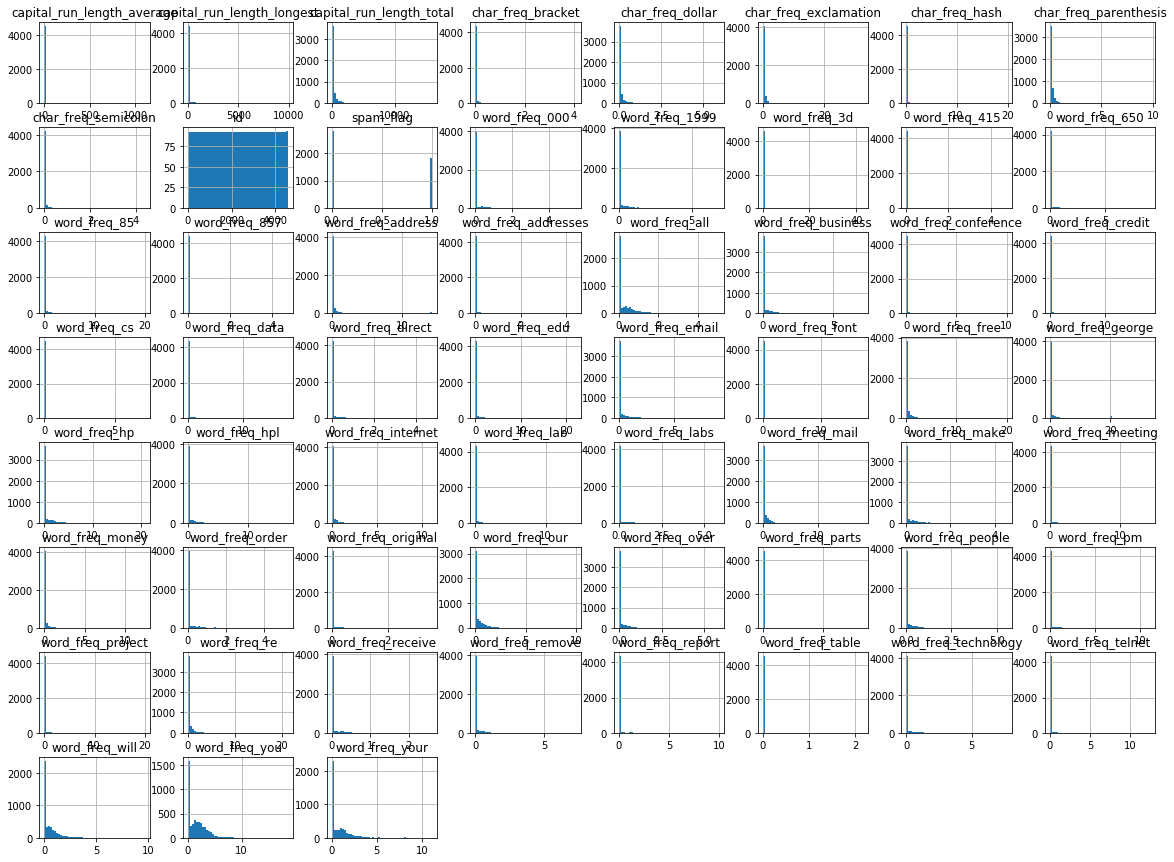

In [8]:
spam_df.hist(bins=50, figsize = (20,15))
plt.show()

## Split Data

In [32]:
X = spam_df.iloc[:, 0 : 57]
y = spam_df.iloc[:, [57]]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [70]:
y_train['spam_flag'].sum()/y_train.count()

spam_flag    0.394099
dtype: float64

In [72]:
y_test['spam_flag'].sum()/y_test.count()

spam_flag    0.393917
dtype: float64

## Decision Tree

In [35]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [36]:
tree.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

In [48]:
dot = export_graphviz(
    tree,
    out_file = "output/tree.dot",
    feature_names = col_names[:-1],
    class_names = 'spam_flag',
    rounded = True,
    filled = True
)

In [38]:
temp = spam_df
temp['predict'] = tree.predict(X)

In [39]:
temp['Accurate'] = np.where(temp['predict']-temp['spam_flag']==0, True, False)

In [40]:
temp['Accurate'].sum()/temp['spam_flag'].count()

0.9091501847424472

### Tune the Decision Tree Hyperparameter

In [115]:
# max_depth = np.linspace(2, 8, 7, endpoint=True)
# min_samples_split = np.linspace(0.1, 0.9, 9, endpoint=True)
# min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = np.linspace(0.1, 0.9, 9, endpoint=True)

In [116]:
#max_depth = list(range(2,9))
#min_samples_split = list(np.arange(0.1, 1.0, 0.1))

In [127]:
max_depth = [2,3,4,5,6]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samples_leaf = [0.1, 0.2, 0.3, 0.4, 0.5]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iter_n = 1

In [128]:
cols = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'test_accuracy', 'pct_deterioration', 'deterioration']
out_df = pd.DataFrame(columns=cols) 

In [129]:
for i in max_depth:
    for j in min_samples_split:
        for k in min_samples_leaf:
            for l in max_features:
                print('begin loop' + str(iter_n))
                print('tree fitting: maxdepth = '+str(i)+', min_samples_split = '+str(j)
                      +', min_samples_leaf = '+str(k)+', max_features = '+str(l))
                
                tree = DecisionTreeClassifier(max_depth = i, min_samples_split = j, 
                                  min_samples_leaf = k, max_features = l,
                                  random_state = 42)
                tree.fit(X_train, y_train)
                
                y_train_score = y_train.copy()
                y_test_score = y_test.copy()
                y_train_score['predict'] = tree.predict(X_train)
                y_test_score['predict'] = tree.predict(X_test)
                
                y_train_score['Accurate'] = np.where(y_train_score['predict']-y_train_score['spam_flag']==0, True, False)
                y_test_score['Accurate'] = np.where(y_test_score['predict']-y_test_score['spam_flag']==0, True, False)
    
                train_accuracy = y_train_score['Accurate'].sum()/y_train_score['spam_flag'].count()
                test_accuracy = y_test_score['Accurate'].sum()/y_test_score['spam_flag'].count()
                pct_deterioration = (train_accuracy - test_accuracy)/train_accuracy
                deterioration = train_accuracy - test_accuracy
    
                out_df = out_df.append(
                        {'max_depth': i,
                         'min_samples_split': j,
                         'min_samples_leaf': k,
                         'max_features': l,
                         'train_accuracy': train_accuracy,
                         'test_accuracy': test_accuracy,
                         'pct_deterioration': pct_deterioration,
                         'deterioration': deterioration
                        },ignore_index = True
                    )
        
                #y_train_score.drop(columns=['predict', 'Accurate'])
                #y_test_score.drop(columns=['predict', 'Accurate'])
    
                print('finish loop'+str(iter_n))
                iter_n += 1

begin loop1
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.1
finish loop1
begin loop2
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.2
finish loop2
begin loop3
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.3
finish loop3
begin loop4
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.4
finish loop4
begin loop5
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.5
finish loop5
begin loop6
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.6
finish loop6
begin loop7
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.7
finish loop7
begin loop8
tree fitting: maxdepth = 2, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 0.8
finish loop8
begin loop9
tree fitting: maxdep

In [130]:
out_df.to_csv('output/decision_tree_hyperpara_tune.csv')